In [1]:
from glob import glob
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt

JetTaggingComparisonFiles = glob(f'/afs/desy.de/group/flc/pool/bliewert/MarlinWorkdirs/ZHH/scripts/JT_Comparison_HHbbbb.root')

In [2]:
rf = ur.open(JetTaggingComparisonFiles[0])

In [22]:
t = rf['JetTaggingComparison']
            
tagsPNet = np.array(t['tags1'].array()).squeeze()
tagsLCFI = np.array(t['tags2'].array()).squeeze()

predPNet = np.argmax(tagsPNet, axis=1)
predLCFI = np.argmax(tagsLCFI, axis=1)

# aggregate s-tag and ud-tag
predPNet[predPNet == 3] = 2

In [33]:
np.unique(pred, return_counts=True)[1]

array([1460,  157,  387])

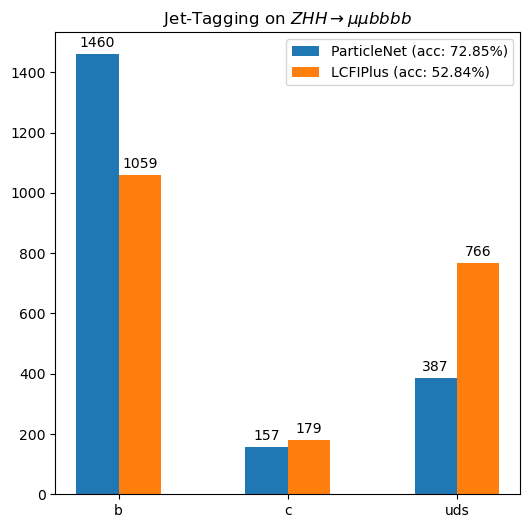

In [39]:
tags = ['b', 'c', 'uds']

label_loc = np.arange(len(tags))
width = .25

fig, ax = plt.subplots(figsize=(6, 6))

for i, (pred, label) in enumerate([(predPNet, 'ParticleNet'), (predLCFI, 'LCFIPlus')]):
    offset = width * i
    acc = (pred == 0).sum() / len(pred)
    #ax.hist(pred, label=f'{label} (acc: {acc:.2%})', bins=3, alpha=0.5)
    counts = np.unique(pred, return_counts=True)[1]
    rects = ax.bar(label_loc + offset, counts, width, label=f'{label} (acc: {acc:.2%})')
    ax.bar_label(rects, padding=3)

ax.set_title(rf'Jet-Tagging on $ZHH \rightarrow \mu\mu bbbb$')
ax.set_xticks(label_loc + width/2, tags)
ax.legend()

In [ ]:
def accuracy(JetTaggingComparisonFiles:list[str]):
    for file in JetTaggingComparisonFiles:
        with ur.open(JetTaggingComparisonFiles[0]) as rf:
            t = rf['JetTaggingComparison']
            
            bTagPNet = np.array(t['tags1'].array()).squeeze()
            bTagLCFI = np.array(t['tags2'].array()).squeeze()
